<font size=7>Raw Data Feed

This function streams the raw data from the maxwell device. It uses a generator to pass the data to python as it become available.

**References**
* [Generator Function Tutorial](https://wiki.python.org/moin/Generators)

# <font color="brown">Test generator functions

## <font color="brown">Test 1

Here I make sure I understand how generator functions work. We generate random data to be fed into the visualizer.

In [ ]:
#import random
import numpy as np
import time
def rawDataFeedTest1():
    num = 0
    while num < 20:
        time.sleep(.2)
        data = np.random.choice( range(10), size=26400 ).tolist() # 26400 is the number of electrodes
        yield data
        num += 1
    print("done")

## <font color="brown"> Test 2

Here we do the same thing as above, but insert a pretty image half of the time.

In [ ]:
import numpy as np
import time
def rawDataFeedTest2():
    num = 0
    while num < 20:
        time.sleep(.2)
        #if num%2:
            #data = np.random.choice( range(10), size=26400 ).tolist() # 26400 is the number of electrodes
        #else:
        temp = np.arange(220)/219*10
        data = temp.tolist()*120
        yield data
        num += 1
    print("done")

## <font color="brown">Test 3

Here we display the activity scan electrodes

function to grap scans

In [6]:
def getScans(space=6):
    scans = []

    for right_shift in range(space): # How many indices we shift right before we start the scan
        for down_shift in range(space):

            electrodes = []
            most_left = down_shift * 220               #  index that is at the left edge of hte grid for a given row
            i_left = right_shift + down_shift * 220    # leftmost index in a row where we collect electrodes

            while i_left/220 < 120:              # check that the row which we want to collect electrodes from is not beyond bottom boundary
                i = i_left                         # Append leftmost electrode to list, then start moving right to collect more
                electrodes.append(i_left)

                while i-most_left+space < 220:  # keep moving right until we reach the rightmost boundary 
                    i += space
                    electrodes.append(i)

                i_left += 220*space         # once we reach the rightmost boundary, jump down to the next row
                most_left += 220*space

            scans.append(electrodes)        # add scan to list of scans
    return scans

In [10]:

def rawDataFeedTest3():
    scans = getScans()
    for scan in scans:
        data = [0]*26400 
        for i in scan:
            data[i]=10
        yield data
        time.sleep(.3)
    print("done")

# <font color="brown"> Test 4

In [7]:
def rawDataFeedTest4():
    new_scan = []
    scans = getScans(5)
    starter = 1055
    for scan in scans:
        for i in range(starter,0,-33):
            new_scan.append( scan.pop(i) )
        starter += -1
    scans.append(new_scan)
    
    for scan in scans:
        data = [0]*26400 
        for i in scan:
            data[i]=10
        yield data
        time.sleep(.5)
    print("done")

# <font color="blue">Realistic `rawDataFeed` function 

This function is meant to resemble as close as possible the output of the actual `rawDataFeed` from [RawDataFeed.ipynb](/notebooks/Projects/Maxwell_Closed_Loop/source_code/RawDataFeed.ipynb). 

In [261]:
#import random
#import time
def rawDataFeed( hz=20000, record_length_s=10):
    #rand_sign = stats.rv_discrete(name='rand_sign', values=([-1,1], [.5,.5]))     # distribution used to change sign of output
    
    for i in range( record_length_s*hz ):
        #time.sleep(1/hz)  # dont need this, because the computation itself causes lag
        
        #final_data = [1 for i in range(1027)]
        data = np.random.lognormal(0, 2, 1027)                               # Use negative binomial to generate data from distribution         
        data_sign = np.random.choice([-1,1],1027)
        final_data = np.round( data * data_sign + 15 )                            # Create final data that emulates maxwell
        yield final_data


In [ ]:
print("loaded function called `rawDataFeed`")

# <font color="brown">Scratch Paper

## <font color="brown">Test Distribution

### Logarithmic Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.lognormal.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html

In [229]:
from scipy import stats

In [242]:
import numpy as np

In [230]:
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [231]:
import numpy as np

In [232]:
mu, sigma = 0., 2 # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000)

In [233]:
count, bins, ignored = plt.hist(s, 100, density=True, align='mid')

In [234]:
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
       / (x * sigma * np.sqrt(2 * np.pi)))

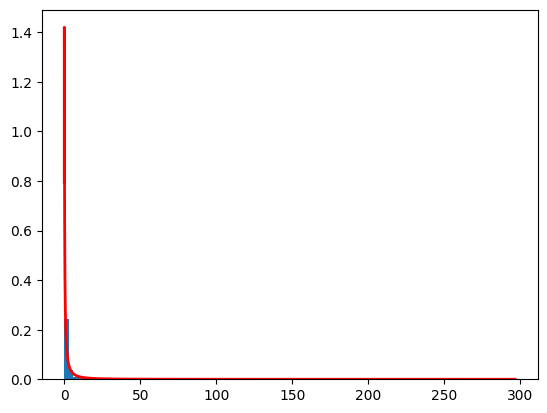

In [235]:
plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.show()

### Emulate a Single Raw Outpute from Feed

In [239]:
data = np.random.lognormal(mu, sigma, 1027)                               # Use negative binomial to generate data from distribution         
rand_sign = stats.rv_discrete(name='rand_sign', values=([-1,1], [.5,.5])) # Change sign of data randomely
data_sign = rand_sign.rvs(size= 1027) 

final_data = np.round( data * data_sign + 15 )                            # Create final data that emulates maxwell